In [1]:
from __future__ import print_function

import sys
import cv2
import copy
import numpy as np
import pandas as pd
from scipy import signal, stats
from datetime import datetime
from scipy import ndimage as ndi
import tensorflow as tf
import matplotlib.pyplot as plt
import gc

In [2]:
def ndiConv(img,filters):
    for i in range(len(img)):
        for j in range(len(filters)):
            stuff = ndi.convolve(randImgs[i], filters[j], mode='constant', cval=0.0,  output=np.float64)
    return stuff

def sigConv(img,filters):
    for i in range(len(img)):
        for j in range(len(filters)):
            stuff = np.rot90(signal.convolve2d(np.rot90(randImgs[i], 2),np.rot90(filters[j],2),mode='same'),2)
    return stuff

def sfftConv(img,filters):
    bh, bw = filters[0].shape
    bh += -1
    bw += -1
    br = bw // 2
    bl = bw - br
    bb = bh // 2
    bt = bh - bb
    for i in range(len(img)):
        for j in range(len(filters)):
            stuff = signal.fftconvolve(randImgs[i],filters[j], mode='full')[bt:-bb,bl:-br]
    return stuff

def tfConvR(img,filters):
    flip = [slice(None, None, -1), slice(None, None, -1)]
    tfa = tf.reshape(np.array(filters,dtype=np.float32).astype(np.float32), [5, 5, 5, 1])
    tfa = tfa[flip]
    tfi = tf.reshape(np.array(img,dtype=np.float32), [len(img)/5, 100, 100, 5])
    tf.Session().run(tf.nn.conv2d(tfi,tfa,strides=[1,1,1,1],padding='SAME'))

In [3]:
mp = []
with open("/afs/inf.ed.ac.uk/user/s14/s1413557/f4k/benchmarking/matlabperf",'r') as mat:
    lines = mat.readlines()
    for l in lines:
        mp.append(float(l.strip().split()[3]))

result = np.zeros((4,20))
result = np.vstack((result,mp))

itera=-1
for n in np.arange(100,2100,100):
    itera+=1
    #Generate random Filters
    filters = [None] * 5
    for i in range(5):
        filters[i] = np.random.rand(5,5)*2-1
    randImgs = [None] * n
    for i in range(n):
        randImgs[i] = np.random.rand(100,100)*256
        
    time = datetime.now()
    ndiConv(randImgs,filters)
    cost = datetime.now() - time
    result[0,itera] = float("{0}".format(cost)[5:])
    #print("Scipy.NDImage.convolve took total of {0}".format(cost))

    time = datetime.now()
    sigConv(randImgs,filters)
    cost = datetime.now() - time
    result[1,itera] = float("{0}".format(cost)[5:])
    #print("Signal.convolve2d      took total of {0}".format(cost))

    time = datetime.now()
    sfftConv(randImgs,filters)
    cost = datetime.now() - time
    result[2,itera] = float("{0}".format(cost)[5:])
    #print("Signal.fftconvolve     took total of {0}".format(cost))

    time = datetime.now()
    tfConvR(randImgs,filters)
    cost = datetime.now() - time
    result[3,itera] = float("{0}".format(cost)[5:])
    #print("TensorFlow.nn.conv2d   took total of {0}".format(cost))
    
    print("Iter {0} complete".format(itera))
    
    del filters
    del randImgs       
    gc.collect()
        

Iter 0 complete
Iter 1 complete
Iter 2 complete
Iter 3 complete
Iter 4 complete
Iter 5 complete
Iter 6 complete
Iter 7 complete
Iter 8 complete
Iter 9 complete
Iter 10 complete
Iter 11 complete
Iter 12 complete
Iter 13 complete
Iter 14 complete
Iter 15 complete
Iter 16 complete
Iter 17 complete
Iter 18 complete
Iter 19 complete


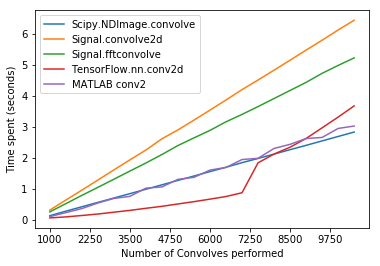

In [4]:
plt.figure
plt.plot(result.T)
ax = plt.gca()
ax.set_xticklabels(np.arange(-250,11000,1250))
ax.set_xlabel("Number of Convolves performed")
ax.set_ylabel("Time spent (seconds)")
ax.legend(['Scipy.NDImage.convolve',
           'Signal.convolve2d',
           'Signal.fftconvolve',
           'TensorFlow.nn.conv2d',
           'MATLAB conv2'])
plt.show()